# Cleveland Heart Disease Dataset

This dataset is available for download [here](https://archive.ics.uci.edu/dataset/45/heart+disease).

## Getting Started
1. `cd environment`
2. `conda env create -f 7641_project_env.yml`
3. `conda activate 7641_project_env`

If that doesn't work...
1. `!pip3 install -U ucimlrepo`

## Data Cleaning and Exploration

In [1]:
from ucimlrepo import fetch_ucirepo 
import pprint
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
pp = pprint.PrettyPrinter(indent=4)
print("Heart Disease metadata")
pp.pprint(heart_disease.metadata)
print(heart_disease.metadata) 
  
# variable information 
print("Heart Disease variables")
print(heart_disease.variables) 

Heart Disease metadata
{   'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long '
                'Beach',
    'additional_info': {   'citation': None,
                           'funded_by': None,
                           'instances_represent': None,
                           'preprocessing_description': None,
                           'purpose': None,
                           'recommended_data_splits': None,
                           'sensitive_data': None,
                           'summary': 'This database contains 76 attributes, '
                                      'but all published experiments refer to '
                                      'using a subset of 14 of them.  In '
                                      'particular, the Cleveland database is '
                                      'the only one that has been used by ML '
                                      'researchers to date.  The "goal" field '
                                   

From the metadata, we see that target values (stored in y) of `0` indicate an absence of heart disease and target values of `1, 2, 3, 4` indicate the presence of it.

Our data is pre-processed, so it should not have any missing values.

In [3]:
# what features do we have?
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [4]:
# what do the targets look like?
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [5]:
# we have 303 patient records
print(X.shape)
print(y.shape)

(303, 13)
(303, 1)


In [6]:
# it looks like we have a few null entries in ca and thal
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [7]:
# see null rows
null_rows = X[X.isnull().any(axis=1)]
# there are only 6 rows with null valeus
null_rows.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0


In this dataset, thal: 3 = normal; 6 = fixed defect; 7 = reversable defect.   
However, we want thal: 1 = normal; 2 = fixed defect; 3 = reversable defect.

In [8]:
X.loc[:, 'thal'] = X['thal'].replace({3:1, 6:2, 7:3})

In [9]:
y.loc[:, 'num'] = y['num'].replace({0:0, 1:1, 2:1, 3:1, 4:1})

In [10]:
ca_mean = int(math.ceil(X['ca'].mean()))
print(f"ca_mean: {ca_mean}")
X.loc[:, 'ca'] = X['ca'].fillna(ca_mean)

thal_mean = int(math.ceil(X['thal'].mean()))
print(f"thal_mean: {thal_mean}")
X.loc[:, 'thal'] = X['thal'].fillna(thal_mean)

ca_mean: 1
thal_mean: 2


In [11]:
# check that there are no null values in the dataset anymore
print(X.isnull().any() == False)

age         True
sex         True
cp          True
trestbps    True
chol        True
fbs         True
restecg     True
thalach     True
exang       True
oldpeak     True
slope       True
ca          True
thal        True
dtype: bool


In [12]:
# export cleaned data to CSV form
X.to_csv("cleveland.csv") 
X['target'] = y
X.to_csv("cleveland_targets.csv", index=False)

In [13]:
# final X
X.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52,1,4,128,255,0,0,161,1,0.0,1,1.0,3.0,1
96,59,1,4,110,239,0,2,142,1,1.2,2,1.0,3.0,1
97,60,0,4,150,258,0,2,157,0,2.6,2,2.0,3.0,1
98,52,1,2,134,201,0,0,158,0,0.8,1,1.0,1.0,0


Now, we want to combine the Cleveland dataset with the Mendeley dataset.

In [14]:
data_url = '../csvs/Cardiovascular_Disease_Dataset.csv'
df = pd.read_csv(data_url)
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [15]:
X = X.rename(columns={"age": "age", "sex": "gender", "cp":"chestpain", "trestbps": "restingBP", 
                    "chol":"serumcholestrol", "fbs":"fastingbloodsugar", "restecg":"restingrelectro", 
                    "thalach":"maxheartrate", "exang":"exerciseangia", "oldpeak":"oldpeak", "slope": "slope", 
                    "ca":"noofmajorvessels", "thal":"thal"})
X = X.drop(['thal'], axis=1)
df = df.drop(['patientid'], axis=1)
X.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,0


slope_mean: 2
unique_values: [3 1 2]


,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


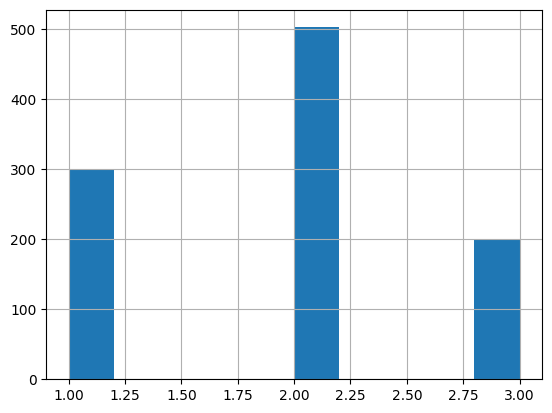

In [16]:
# df['slope'].hist()
slope_mean = int(math.ceil(df[df['slope'].isin([1, 2, 3])]['slope'].mean()))
print(f"slope_mean: {slope_mean}")
df.loc[:, 'slope'] = df['slope'].replace(0, slope_mean)
df['slope'].hist()
unique_values = df['slope'].unique()
print(f"unique_values: {unique_values}")
df.head()

<Axes: >

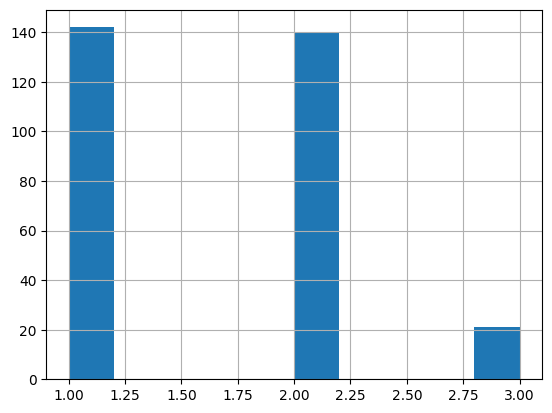

In [17]:
X['slope'].hist()

<Axes: >

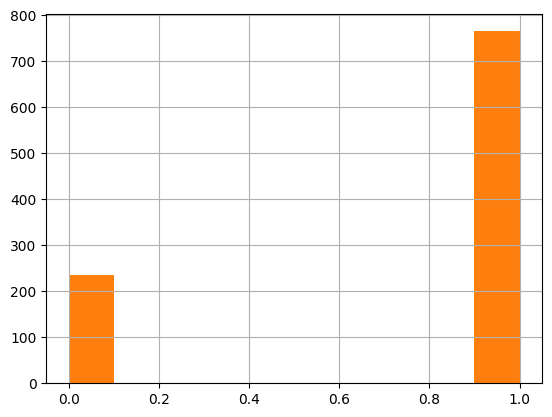

In [18]:
# 1 = male so men are overrepresented in the dataset
X['gender'].hist()
df['gender'].hist()

<Axes: >

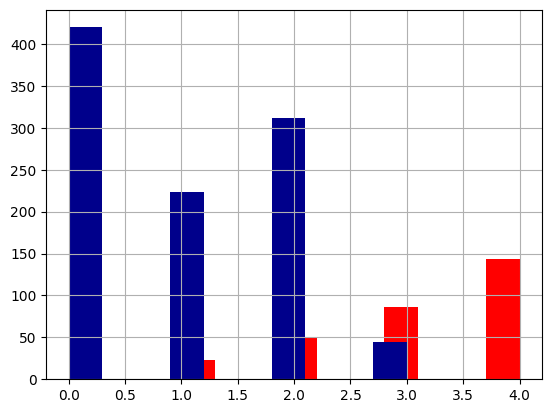

In [29]:
X['chestpain'].hist(color="red")
df['chestpain'].hist(color="darkblue")